In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [29]:
df = pd.read_csv("data.csv", low_memory=False)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df['Date'] = pd.to_datetime(df['Date']) # The data is changed to datetime var type
df.head()

The dataset has 318477 rows and 13 columns.


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## Classifications

Text(0, 0.5, 'Classification')

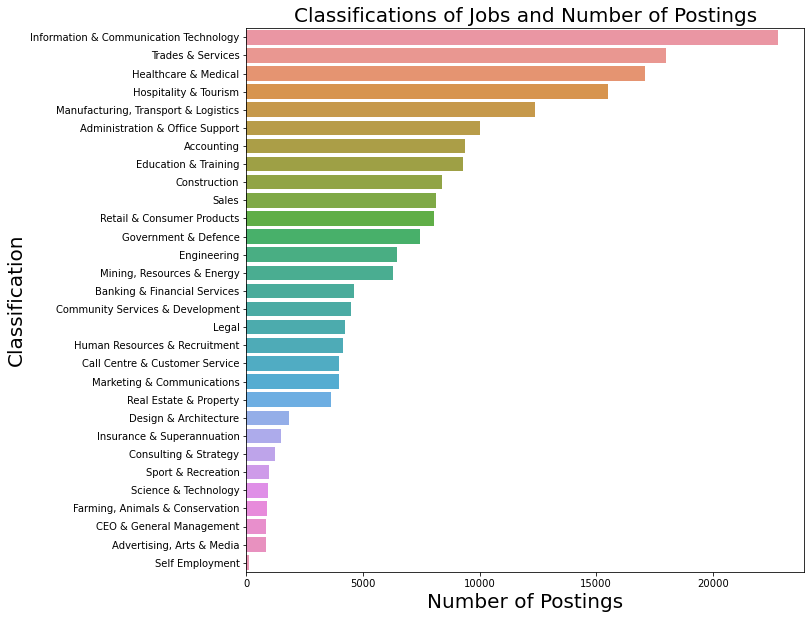

In [9]:
by_class = df.groupby(['Classification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_class, x=by_class.Id, y=by_class.Classification)
plt.title("Classifications of Jobs and Number of Postings",size=20)
plt.xlabel("Number of Postings",size=20)
plt.ylabel("Classification",size=20)

## Sub Classifications

Text(0, 0.5, 'SubClassification')

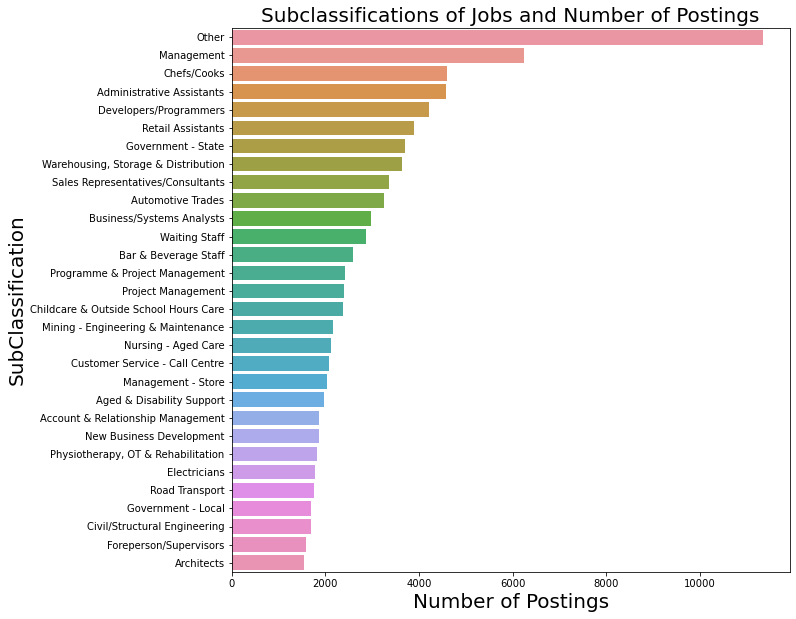

In [10]:
by_Subclass = df.groupby(['SubClassification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
by_Subclass = by_Subclass[:30]
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_Subclass, x=by_Subclass.Id, y=by_Subclass.SubClassification)
plt.title("Subclassifications of Jobs and Number of Postings",size=20)
plt.xlabel("Number of Postings",size=20)
plt.ylabel("SubClassification",size=20)

## Locations

In [11]:
%matplotlib inline
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

#Sort by descending to have the top 5 Cities at the top
locationDf = locationDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = locationDf[:5].copy()
#Add a new row that will be all of the countries under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Location' : ['others'],
                              'Count' : [locationDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
locationDf = pd.concat([df2, new_row])
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,Melbourne,46690
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,Adelaide,6653


Text(0.5, 1.0, 'Market share of locations')

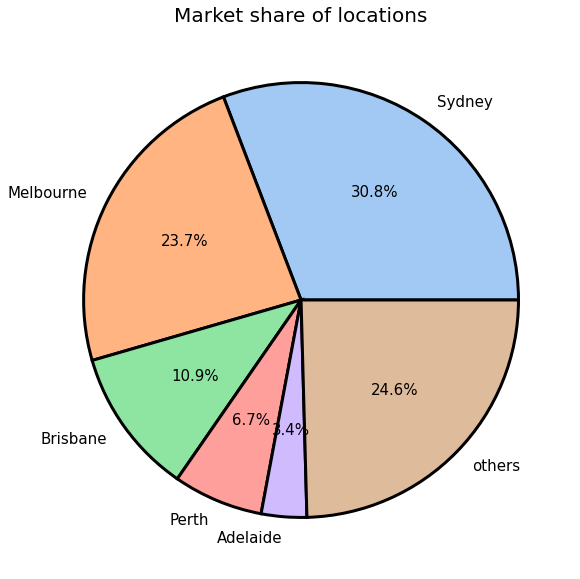

In [12]:
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(10, 10))
plt.pie(data=locationDf, x=locationDf.Count, labels=locationDf.Location, colors=colors, autopct='%0.1f%%', 
        textprops={'fontsize': 15}, wedgeprops={'edgecolor':'black','linewidth':3})
plt.title("Market share of locations",size=20)

## Jobs by Salary Range

In [22]:
by_lowSal = df.groupby('LowestSalary', as_index=False).count()
by_lowSal['labels'] = by_lowSal['LowestSalary']

by_HighSal = df.groupby('HighestSalary', as_index=False).count()
by_HighSal['labels'] = by_HighSal['HighestSalary']

Text(0.5, 1.0, 'Job Posts by Highest Salary')

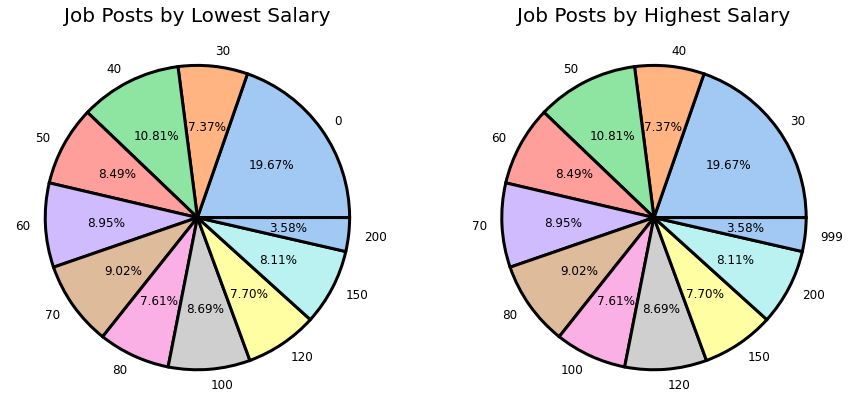

In [23]:
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=by_lowSal, x=by_lowSal.Id, labels=by_lowSal.labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})
plt.title("Job Posts by Lowest Salary", size=20)

# colors = sns.color_palette('pastel')
# fig = plt.figure(figsize=(10, 10))
plt.subplot(122)
plt.pie(data=by_HighSal, x=by_HighSal.Id, labels=by_HighSal.labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})
plt.title("Job Posts by Highest Salary", size=20)

AverageSalary
15.0      15,000
35.0      35,000
45.0      45,000
55.0      55,000
65.0      65,000
75.0      75,000
90.0      90,000
110.0    110,000
135.0    135,000
175.0    175,000
599.5    599,500
Name: AverageSalary, dtype: object


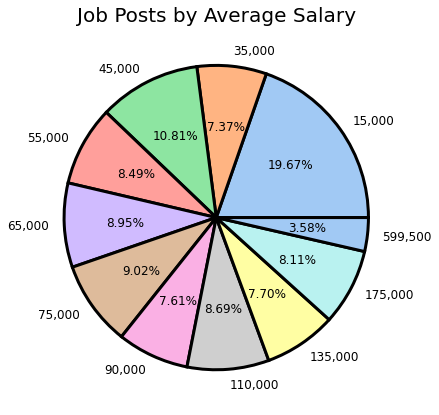

In [17]:
# Create a new column for the average salary and visualise it
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df.head()

#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

labels = averageSalaryDf["AverageSalary"]
# labels = df.assign(AverageSalary = lambda row: row.AverageSalary)
print(labels)

colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=averageSalaryDf, x=averageSalaryDf.Id, labels=labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})

plt.title("Job Posts by Average Salary", size=20);

In [24]:
averageSalaryDf.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499


## Job Type

Text(0.5, 1.0, 'Job Type Distribution')

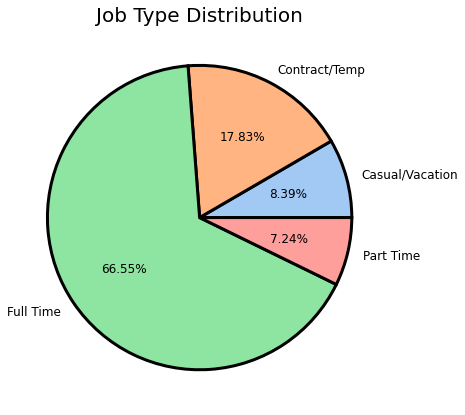

In [38]:
# Part Time
# Full Time
# Contract/Temp
# Casual/Vacation

# %matplotlib inline
# JobTypeDf = df[df['JobType'].isna()==False]
# JobTypeDf = JobTypeDf.groupby('JobType').count()

# JobTypeDf['JobType'] = (JobTypeDf.index*1000).astype(float).map('{:,.0f}'.format)
# JobTypeDf['Count'] = JobTypeDf["Id"]
# JobTypeDf

JobType = df.groupby('JobType', as_index=False).count()
JobType['labels'] = JobType['JobType']

colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=JobType, x=JobType.Id, labels=JobType.labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})
plt.title("Job Type Distribution", size=20)
